<a href="https://colab.research.google.com/github/rajchoksi1997/CMPE257-Project/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

## Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataSet = pd.read_csv('/content/drive/MyDrive/timeseries.csv')

In [ ]:
print("First 5 Rows\n")
dataSet.head()

First 5 Rows



,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [ ]:
print("Last five rows\n")
dataSet.tail()

Last five rows



,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
19300675,56043,2016-12-27,0.16,82.88,1.63,-7.97,-13.49,-12.81,-1.39,-13.60,...,-9.41,5.90,7.63,3.61,4.02,8.58,10.39,5.92,4.47,0.0
19300676,56043,2016-12-28,0.02,83.33,1.41,-8.71,-14.10,-13.84,-2.49,-13.56,...,-10.55,6.50,11.43,4.11,7.32,9.92,14.49,7.26,7.22,NaN
19300677,56043,2016-12-29,0.00,83.75,1.59,-7.96,-13.30,-13.03,0.42,-14.51,...,-10.29,4.29,6.24,2.03,4.22,6.56,10.07,3.20,6.87,NaN
19300678,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,-4.14,4.98,7.34,1.99,5.35,7.28,10.12,3.24,6.89,NaN
19300679,56043,2016-12-31,0.44,82.19,1.75,-7.56,-11.98,-11.82,-0.95,-11.61,...,-10.17,2.31,3.47,0.41,3.06,3.37,5.26,0.66,4.60,NaN


In [ ]:
print("Data Show Describe")
dataSet.describe()

Data Show Describe


,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,2.756796e+06
mean,3.067038e+04,2.644145e+00,9.665578e+01,7.816178e+00,1.280146e+01,6.951072e+00,6.986916e+00,1.868141e+01,7.411665e+00,1.126974e+01,1.288900e+01,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,8.245298e-01
std,1.497911e+04,6.226305e+00,5.447994e+00,4.694305e+00,1.092674e+01,1.014551e+01,1.009116e+01,1.154487e+01,1.057680e+01,4.005165e+00,1.114961e+01,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.200000e-01,-3.734000e+01,-3.770000e+01,-3.746000e+01,-3.220000e+01,-4.596000e+01,3.000000e-02,-3.823000e+01,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.584000e+01,3.780000e+00,4.450000e+00,-9.600000e-01,-9.200000e-01,1.027000e+01,-7.000000e-01,8.420000e+00,4.340000e+00,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,0.000000e+00
50%,2.921200e+04,1.800000e-01,9.830000e+01,6.840000e+00,1.402000e+01,7.570000e+00,7.580000e+00,2.040000e+01,8.030000e+00,1.124000e+01,1.404000e+01,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,0.000000e+00
75%,4.600750e+04,2.160000e+00,9.996000e+01,1.135000e+01,2.188000e+01,1.552000e+01,1.552000e+01,2.787000e+01,1.614000e+01,1.408000e+01,2.207000e+01,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,1.189600e+00
max,5.604300e+04,2.345900e+02,1.043200e+02,2.292000e+01,4.139000e+01,2.755000e+01,2.755000e+01,4.991000e+01,3.380000e+01,3.461000e+01,4.385000e+01,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00


In [ ]:
print("Datatype of Attributes\n")
dataSet.info()

Datatype of Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [ ]:
print("Data Show Columns:\n")
dataSet.columns

Data Show Columns:



Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [ ]:
print("Data Show Shape")
dataSet.shape

Data Show Shape


(19300680, 21)

In [ ]:
print("Sum of null values")
dataSet.isnull().sum()

Sum of null values


fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [ ]:
print("Null values in the data\n")
dataSet.isnull().values.any()

Null values in the data



True

In [ ]:
# Drop missing values in target variable
dataSet = dataSet.dropna()
dataSet.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
print("Null values in the data\n")
dataSet.isnull().values.any()

Null values in the data



False

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dataSet.isnull(),cmap='RdPu')
plt.show()

In [ ]:
column_list = list(dataSet.columns)
column_list

In [ ]:
# Number of unique values in each of the columns.
dataSet.nunique()

In [ ]:
date = dataSet['date']
date.head()

In [ ]:
# Extract year, day and month into new columns
dataSet['year'] = pd.DatetimeIndex(date).year
dataSet['month'] = pd.DatetimeIndex(date).month
dataSet['day'] = pd.DatetimeIndex(date).day
dataSet.dtypes

In [ ]:
dataSet['score'].value_counts()

In [ ]:
# Binning target variable into 6classes
dataSet['score'] = dataSet['score'].round().astype(int)

In [ ]:
dataSet['score'].value_counts()

In [ ]:
dataSet.describe(include=['object'])

In [ ]:
# Removing special characters from continuous features
for c in ['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']:
    unique_val_cols = dataSet[c].unique()
    print ('Unique values in ' , c , 'are ', unique_val_cols)

In [ ]:
for c in ['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']:
    dataSet[c] = pd.to_numeric(dataSet[c], errors='coerce')

In [ ]:
dataSet.info()

In [ ]:
sns.set(style="darkgrid")
dataSet.hist(bins=10,figsize=(15,13) ,color = 'navy', alpha = 0.5)
plt.show()

## The Drought dataset is a labelled dataset. Distribution of scores is analyzed to identify if data is biased or not.
## It can be seen that the features PRICTOT ,WS10M-MIN,WS50M-MIN,WS10M-RANGE are skewed to the left.
## The features PS,T2M,T2M-MAX are skewed to the right while remaining features are fairly well distributed across all range.

# Exploratory Data Analysis

## Univariate Analysis on Descriptive Statistics

In [ ]:
# For numeric 
dataSet.describe()

In [ ]:
# For categorical
dataSet[["year","month","day"]].describe()

In [ ]:
print("Skewness")
dataSet.skew(axis = 0, skipna = True)

In [ ]:
print("Kurtosis")
dataSet.kurtosis(axis = 0, skipna = True)

# Exploratory Data Analysis

## Univariate Analysis on Distribution of continuous variables

In [ ]:
list_of_columns = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
measures_df = dataSet[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

In [ ]:
for col in list_of_columns:
    plt.figure()
    plt.hist(dataSet[col], density = True)
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

# Identifying the outliers

In [ ]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [ ]:
print('Total rows:')
len(measures_df.index)

In [ ]:
for i in measures_df.select_dtypes(exclude = ['object']).columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# Deleting the values which are beyond the outlier value limit

In [ ]:
dataSet = dataSet[(dataSet['PRECTOT'] <= dataSet['PRECTOT'].mean() + 3*dataSet['PRECTOT'].std()) &
        (dataSet['PRECTOT'] >= dataSet['PRECTOT'].mean() - 3*dataSet['PRECTOT'].std())]

In [ ]:
dataSet = dataSet[(dataSet['PS'] <= dataSet['PS'].mean() + 3*dataSet['PS'].std()) &
        (dataSet['PS'] >= dataSet['PS'].mean() - 3*dataSet['PS'].std())]

In [ ]:
dataSet = dataSet[(dataSet['QV2M'] <= dataSet['QV2M'].mean() + 3*dataSet['QV2M'].std()) &
        (dataSet['QV2M'] >= dataSet['QV2M'].mean() - 3*dataSet['QV2M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M'] <= dataSet['T2M'].mean() + 3*dataSet['T2M'].std()) &
        (dataSet['T2M'] >= dataSet['T2M'].mean() - 3*dataSet['T2M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2MDEW'] <= dataSet['T2MDEW'].mean() + 3*dataSet['T2MDEW'].std()) &
        (dataSet['T2MDEW'] >= dataSet['T2MDEW'].mean() - 3*dataSet['T2MDEW'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2MWET'] <= dataSet['T2MWET'].mean() + 3*dataSet['T2MWET'].std()) &
        (dataSet['T2MWET'] >= dataSet['T2MWET'].mean() - 3*dataSet['T2MWET'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_MAX'] <= dataSet['T2M_MAX'].mean() + 3*dataSet['T2M_MAX'].std()) &
        (dataSet['T2M_MAX'] >= dataSet['T2M_MAX'].mean() - 3*dataSet['T2M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_MIN'] <= dataSet['T2M_MIN'].mean() + 3*dataSet['T2M_MIN'].std()) &
        (dataSet['T2M_MIN'] >= dataSet['T2M_MIN'].mean() - 3*dataSet['T2M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_RANGE'] <= dataSet['T2M_RANGE'].mean() + 3*dataSet['T2M_RANGE'].std()) &
        (dataSet['T2M_RANGE'] >= dataSet['T2M_RANGE'].mean() - 3*dataSet['T2M_RANGE'].std())]

In [ ]:
dataSet = dataSet[(dataSet['TS'] <= dataSet['TS'].mean() + 3*dataSet['TS'].std()) &
        (dataSet['TS'] >= dataSet['TS'].mean() - 3*dataSet['TS'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M'] <= dataSet['WS10M'].mean() + 3*dataSet['WS10M'].std()) &
        (dataSet['WS10M'] >= dataSet['WS10M'].mean() - 3*dataSet['WS10M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_MAX'] <= dataSet['WS10M_MAX'].mean() + 3*dataSet['WS10M_MAX'].std()) &
        (dataSet['WS10M_MAX'] >= dataSet['WS10M_MAX'].mean() - 3*dataSet['WS10M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_MIN'] <= dataSet['WS10M_MIN'].mean() + 3*dataSet['WS10M_MIN'].std()) &
        (dataSet['WS10M_MIN'] >= dataSet['WS10M_MIN'].mean() - 3*dataSet['WS10M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_RANGE'] <= dataSet['WS10M_RANGE'].mean() + 3*dataSet['WS10M_RANGE'].std()) &
        (dataSet['WS10M_RANGE'] >= dataSet['WS10M_RANGE'].mean() - 3*dataSet['WS10M_RANGE'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M'] <= dataSet['WS50M'].mean() + 3*dataSet['WS50M'].std()) &
        (dataSet['WS50M'] >= dataSet['WS50M'].mean() - 3*dataSet['WS50M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_MAX'] <= dataSet['WS50M_MAX'].mean() + 3*dataSet['WS50M_MAX'].std()) &
        (dataSet['WS50M_MAX'] >= dataSet['WS50M_MAX'].mean() - 3*dataSet['WS50M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_MIN'] <= dataSet['WS50M_MIN'].mean() + 3*dataSet['WS50M_MIN'].std()) &
        (dataSet['WS50M_MIN'] >= dataSet['WS50M_MIN'].mean() - 3*dataSet['WS50M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_RANGE'] <= dataSet['WS50M_RANGE'].mean() + 3*dataSet['WS50M_RANGE'].std()) &
        (dataSet['WS50M_RANGE'] >= dataSet['WS50M_RANGE'].mean() - 3*dataSet['WS50M_RANGE'].std())]

In [ ]:
print('Total rows:')
len(dataSet.index)

# Univariate Analysis on distribution of categorical variables

In [ ]:
categorical_columns = ['score','year','month','day']
categorical_data = dataSet[['score','year','month','day']]

In [ ]:
#categorical variables
plt.figure(figsize=(10,40))
for col in categorical_columns:
    plt.figure()
    categorical_data[col].value_counts().plot(kind = 'bar')
    x_label = col
    y_label = 'DENSITY'
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title('{x_name} distribution'.format(x_name=x_label))
    plt.tight_layout()

# Bivariate analysis on categorical variables

In [ ]:
plt.scatter(dataSet['year'], dataSet['score'], c ="green")
plt.show()

In [ ]:


plt.scatter(dataSet['month'], dataSet['score'], c ="blue")
plt.show()

In [ ]:
plt.scatter(dataSet['day'], dataSet['score'], c ="black")
plt.show()

In [ ]:
plt.scatter(dataSet['QV2M'], dataSet['T2M'], c =dataSet['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
plt.show()

In [ ]:
plt.scatter(dataSet['T2M'], dataSet['T2MDEW'], c =dataSet['score'])
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2M vs T2MDEW')
plt.show()

In [ ]:
temp_dataSet = dataSet[dataSet['score']==5]
plt.scatter(dataSet['WS10M'], dataSet['WS50M'], c= dataSet['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS10M vs WS50M')
plt.show()

# To understand the correlations between features scatter plots were drawn to find out the attributes having strong correlation.

# In the above scatter plots we can observe that the independent variables have shown strong positive correlation.

# The pairs WS10M - WS50M have the one-to-one relationship.

# The features T2M – T2MDEW and QV2M - T2M relationship is not inear, although we can say that the overall they have strong correlation.

# Stripping target values from dataset

In [ ]:
features = dataSet.drop('score', 1)
features = features.drop('date', 1)
features = features.drop('fips', 1)

In [ ]:
features

In [ ]:
target = dataSet['score']
target.head()

# Correlation between features

In [ ]:
correlation_plot = measures_df.corr()
correlation_plot.style.background_gradient(cmap = 'YlGnBu')

# Attributes T2M_MAX, T2M_MIN, T2MDEW, T2MWET, QV2M, T2M, and TS have shown strong positive correlation

# Likewise, WS10M, WS10M_MAX and WS10M_MIN have shown a strong positve correlation

# Similarly, WS50M, WS50M_MAX and WS50M_MIN show strong positive correlation

# But, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence,all the variables are retained, and other feature selection methods needs to be experimented.

# Splitting the dataset into training and testing data

In [ ]:
features.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [ ]:
print("Shape of train features:")
x_train.shape

In [ ]:
print("Shape of train targets:") 
y_train.shape

In [ ]:
print("Shape of test features:")
x_test.shape

In [ ]:
print("Shape of test target:")
y_test.shape

#Data Standardization

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Feature Selection

In [ ]:
Estimator = RandomForestClassifier(n_estimators=9) 
#using random forest as the estimator for recursive feature extractor

In [ ]:
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=15)
fitter = FeatureExtractor.fit(x_train, y_train)

In [ ]:
print("Number of Extracted Features: %s" % (fitter.n_features_))

In [ ]:
print("Extracted Features: %s" % (fitter.support_))

In [ ]:
print("Ranking of Features: %s" % (fitter.ranking_))

In [ ]:
extracted_features = features.columns[(fitter.get_support())]

In [ ]:
print(extracted_features)

In [ ]:
features = features.drop('PRECTOT', 1)
features = features.drop('T2MWET', 1)
features = features.drop('WS10M_MAX', 1)
features = features.drop('WS10M_MIN', 1)
features = features.drop('WS50M_MIN', 1)
features = features.drop('month', 1)
features.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [ ]:
print("Train shape", x_train.shape)

In [ ]:
print("Test shape", x_test.shape)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Class Imbalance

##Downsampling using Neighborhood Cleaning Rule

In [ ]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

In [ ]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

##Downsampling using Near Miss

In [ ]:
downsampler = NearMiss()

In [ ]:
x_train_dres_nm, y_train_dres_nm = downsampler.fit_resample(x_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

##Upsampling using SMOTE

In [ ]:
upsampler = SMOTE(random_state = 5)

In [ ]:
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

#**Dimentionality** **Reduction**

#**Linear Discriminant Analysis**




####**Linear** **Discriminant Analysis on UpSampled Data using SMOTE**

In [ ]:
LDanalysis = LDA(n_components=5)


In [ ]:
X_train_upsampled_LDA=LDanalysis.fit_transform(x_train_ures_SMOTE,y_train_ures_SMOTE)

In [ ]:
X_test_upsampled_LDA_transformed=LDanalysis.transform(x_test)

In [ ]:
print("Features shape of Train Data", x_train.shape)
print("Dimensionality reduced features shape using LDA on Upsampled data", X_train_upsampled_LDA.shape)
print("Dimensionality reduced features shape using LDA on testing data", X_test_upsampled_LDA_transformed.shape)

####**Linear Discriminant Analysis on Downsampled Data using Near Miss**

In [ ]:
LDanalysis = LDA(n_components=5)

In [ ]:
X_train_downsampled_nm_LDA=LDanalysis.fit_transform(x_train_dres_nm,y_train_dres_nm)

In [ ]:
X_test_downsampled_nm_LDA_transformed=LDanalysis.transform(x_test)

In [ ]:
print("Features shape of Train Data", x_train.shape)
print("Dimensionality reduced features shape using LDA on near miss downsampled data", X_train_downsampled_nm_LDA.shape)
print("Dimensionality reduced features shape using LDA on near miss downsampled testing data", X_test_downsampled_nm_LDA_transformed.shape)

#**Principal Component Analysis**

####**Principal Component Analysis on Upsampled Data using SMOTE**

In [ ]:
PCanalysis = PCA()

In [ ]:
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)


In [ ]:
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

In [ ]:
PCanalysis = PCA(n_components=5)
# picking values with more than 90% variance


In [ ]:
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

####**Principal Component Analysis on DownSampled Data**

In [ ]:
PCanalysis = PCA()

In [ ]:
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres_nm)


In [ ]:
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

In [ ]:
PCanalysis = PCA(n_components = 5)
# picking values with more than 90% variance

In [ ]:
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres_nm)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

#Modeling

##Decision Tree Algorithm with SMOTE Upsampled data

In [ ]:
dt_Classifier_up_smote = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
dt_Classifier_up_smote.fit(x_train_ures_SMOTE,y_train_ures_SMOTE)
#training prediction
y_train_pred = dt_Classifier_up_smote.predict(x_train_ures_SMOTE)
#testing prediction
y_prediction_up_smote = dt_Classifier_up_smote.predict(x_test)

In [ ]:
print('training f1 score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm with SMOTE upsampled data:\n')
print(confusion_matrix(y_test, y_prediction_up_smote))
print(classification_report(y_test, y_prediction_up_smote))
print('Accuracy:',accuracy_score(y_test, y_prediction_up_smote))
print('Precision:',precision_score(y_test, y_prediction_up_smote, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_up_smote, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_up_smote, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_up_smote))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_up_smote, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE upsampled data',dpi=400)

In [ ]:
pickle.dump(dt_Classifier_up_smote, open('dt_Classifier_up_smote.pkl', 'wb'))

##Decision Tree Algorithm with PCA and SMOTE Upsampled data

In [ ]:
dt_classifier_smote_upsampling_pca = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_smote_upsampling_pca.fit(X_train_upsampled_pca,y_train_ures_SMOTE)
#training prediction
y_train_pred = dt_classifier_smote_upsampling_pca.predict(X_train_upsampled_pca)
#testing prediction
y_prediction_smote_upsampling_pca = dt_classifier_smote_upsampling_pca.predict(X_test_upsampled_transformed_pca)

In [ ]:
print('Training F1 Score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm with PCA and SMOTE Upsampled data:\n')
print(confusion_matrix(y_test, y_prediction_smote_upsampling_pca))
print(confusion_matrix(y_test, y_prediction_smote_upsampling_pca))
print(classification_report(y_test, y_prediction_smote_upsampling_pca))
print('Accuracy:',accuracy_score(y_test, y_prediction_smote_upsampling_pca))
print('Precision:',precision_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_smote_upsampling_pca))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_smote_upsampling_pca, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with PCA and SMOTE Upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with PCA and SMOTE Upsampled data',dpi=400)

In [ ]:
pickle.dump(dt_classifier_smote_upsampling_pca, open('dt_classifier_smote_upsampling_pca.pkl', 'wb'))

##Decision Tree Algorithm with LDA and SMOTE Upsampled Data

In [ ]:
dt_classifier_smote_upsampled_lda = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_smote_upsampled_lda.fit(X_train_upsampled_LDA,y_train_ures_SMOTE)
#training prediction
y_train_pred = dt_classifier_smote_upsampled_lda.predict(X_train_upsampled_LDA)
#testing prediction
y_pred_smote_upsampled_lda = dt_classifier_smote_upsampled_lda.predict(X_test_upsampled_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm with  LDA and SMOTE Upsampled Data:\n')
print(confusion_matrix(y_test, y_pred_smote_upsampled_lda))
print(confusion_matrix(y_test, y_pred_smote_upsampled_lda))
print(classification_report(y_test, y_pred_smote_upsampled_lda))
print('Accuracy:',accuracy_score(y_test, y_pred_smote_upsampled_lda))
print('Precision:',precision_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_smote_upsampled_lda))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_smote_upsampled_lda, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with LDA and SMOTE Upsampled Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with LDA and SMOTE Upsampled Data',dpi=400)

In [ ]:
pickle.dump(y_pred_smote_upsampled_lda, open('y_pred_smote_upsampled_lda.pkl', 'wb'))

##Decision Tree Algorithm with Near Miss Downsampled Data

In [ ]:
dt_classifier_nm_downsampled = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_nm_downsampled.fit(x_train_dres_nm,y_train_dres_nm)
#training prediction
y_train_pred = dt_classifier_nm_downsampled.predict(x_train_dres_nm)
#testing prediction
y_prediction_nm_downsampled = dt_classifier_nm_downsampled.predict(x_test)

In [ ]:
print('f1 score:',f1_score(y_train_dres_nm, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled))
print(classification_report(y_test, y_prediction_nm_downsampled))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampled Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampled Data',dpi=400)

In [ ]:
pickle.dump(dt_classifier_nm_downsampled, open('dt_classifier_nm_downsampled.pkl', 'wb'))

##Decision Tree Algorithm with PCA and Near Miss Downsampled Data

In [ ]:
dt_classifier_nm_downsampled_pca = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_nm_downsampled_pca.fit(x_train_downlsampled_pca,y_train_dres_nm)
#training prediction
y_train_pred = dt_classifier_nm_downsampled_pca.predict(x_train_downlsampled_pca)
#testing prediction
y_prediction_nm_downsampled_pca = dt_classifier_nm_downsampled_pca.predict(x_test_downsampled_transformed_pca)

In [ ]:
print('F1 Score:',f1_score(y_train_dres_nm, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm with PCA and Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled_pca))
print(confusion_matrix(y_test, y_prediction_nm_downsampled_pca))
print(classification_report(y_test, y_prediction_nm_downsampled_pca))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled_pca))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled_pca))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled_pca, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with PCA and Near Miss Downsampled Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with PCA and Near Miss Downsampled Data',dpi=400)

In [ ]:
pickle.dump(dt_classifier_nm_downsampled_pca, open('dt_classifier_nm_downsampled_pca.pkl', 'wb'))

##Decision Tree Algorithm with LDA and Near Miss Downsampled Data

In [ ]:
dt_classifier_nm_downsampled_lda = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_nm_downsampled_lda.fit(X_train_downsampled_nm_LDA,y_train_dres_nm)
#training prediction
y_train_pred = dt_classifier_nm_downsampled_lda.predict(X_train_downsampled_nm_LDA)
#testing prediction
y_prediction_nm_downsampled_lda = dt_classifier_nm_downsampled_lda.predict(X_test_downsampled_nm_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_train_dres_nm, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm with LDA and Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled_lda))
print(confusion_matrix(y_test, y_prediction_nm_downsampled_lda))
print(classification_report(y_test, y_prediction_nm_downsampled_lda))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled_lda))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled_lda))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled_lda, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with LDA and Near Miss Downsampled Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with LDA and Near Miss Downsampled Data',dpi=400)

In [ ]:
pickle.dump(dt_classifier_nm_downsampled_lda, open('dt_classifier_nm_downsampled_lda.pkl', 'wb'))

##Decision Tree Algorithm with Near Miss Downsampled Data - Hyperparameter Tuning

In [ ]:
params = {
          'max_depth': [3, 5, 10, 20],
          'min_samples_leaf': [10, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}


In [ ]:
grid_search_dt_nm = GridSearchCV(estimator=dt_classifier_nm_downsampled, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search_dt_nm.fit(x_train_dres_nm,y_train_dres_nm)

In [ ]:
score_DF = pd.DataFrame(grid_search_dt_nm.cv_results_)
score_DF.nlargest(5,"mean_test_score")

##Decision Tree Algorithm without resampling of Data

In [ ]:
dt_classifier_no_resampling = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_no_resampling.fit(x_train,y_train)
#training prediction
y_train_pred = dt_classifier_no_resampling.predict(x_train)
#testing prediction
y_prediction_dt_no_resampling = dt_classifier_no_resampling.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm without resampling of Data:\n')
print(confusion_matrix(y_test, y_prediction_dt_no_resampling))
print(classification_report(y_test, y_prediction_dt_no_resampling))
print('Accuracy:',accuracy_score(y_test, y_prediction_dt_no_resampling))
print('Precision:',precision_score(y_test, y_prediction_dt_no_resampling, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_dt_no_resampling, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_dt_no_resampling, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_dt_no_resampling))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_dt_no_resampling, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling of Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling of Data',dpi=400)

##Decision Tree Algorithm without resampling of Data - Hyperparameter Tuning

In [ ]:
dt_classifier_no_resampling.get_depth()

In [ ]:
params = {
          'max_depth': [40, 50, 60, 70, 80],
          'max_features':['log2','sqrt',None]
}

In [ ]:
gridSearch = GridSearchCV(estimator=dt_classifier_no_resampling, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
gridSearch.fit(x_train,y_train)

In [ ]:
scoreDF = pd.DataFrame(gridSearch.cv_results_)
scoreDF.nlargest(5,"mean_test_score")

##Decision Tree Algorithm without resampling of Data - Setting the right hyperparameters

In [ ]:
dt_classifier_no_resampling = tree.DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=70)
dt_classifier_no_resampling.fit(x_train,y_train)
#testing prediction
y_pred_dt_no_resampling_with_hyperparameters = dt_classifier_no_resampling.predict(x_test)

#training prediction
y_train_pred = dt_classifier_no_resampling.predict(x_train)


In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

In [ ]:
print('Analysis of Decision Tree Algorithm without resampling of Data - Setting the right hyperparameters:\n')
print(confusion_matrix(y_test, y_pred_dt_no_resampling_with_hyperparameters))
print(classification_report(y_test, y_pred_dt_no_resampling_with_hyperparameters))
print('Accuracy:',accuracy_score(y_test, y_pred_dt_no_resampling_with_hyperparameters))
print('Precision:',precision_score(y_test, y_pred_dt_no_resampling_with_hyperparameters, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_dt_no_resampling_with_hyperparameters, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_dt_no_resampling_with_hyperparameters, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_dt_no_resampling_with_hyperparameters))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_dt_no_resampling_with_hyperparameters, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling of Data - Setting the right hyperparameters')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling of Data - Setting the right hyperparameters',dpi=400)

In [ ]:
pickle.dump(dt_classifier_no_resampling, open('dt_classifier_no_resampling.pkl', 'wb'))

#KNN Classifier

#KNN Algorithm without resampling

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

In [ ]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling',dpi=300)

#KNN Algorithm without resampling - Hyperparameter Tuning

In [ ]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

#KNN Algorithm without resampling - Setting the right hyperparameters

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

In [ ]:
pickle.dump(knn_classifier, open('knn_classifier.pkl', 'wb'))

In [ ]:
print('Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning',dpi=300)

#KNN Algorithm with SMOTE upsampling

In [ ]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(x_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(x_test)

In [ ]:
pickle.dump(knn_classifier_SMOTE, open('knn_classifier_SMOTE.pkl', 'wb'))

In [ ]:
print('training f1 score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

In [ ]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

#KNN Algorithm with Near Miss downsampling

In [ ]:
knn_classifier_NM = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_NM.fit(x_train_dres_nm, y_train_dres_nm)
y_pred_knn_NM = knn_classifier_NM.predict(x_test)

In [ ]:
pickle.dump(knn_classifier_NM, open('knn_classifier_NM.pkl', 'wb'))

In [ ]:
print('f1 score:',f1_score(y_train_dres_nm, y_pred_knn_NM, average='weighted'))

In [ ]:
print('Performance of KNN Algorithm with NM Downsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_NM))
print(classification_report(y_test, y_pred_knn_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_NM))
print('Precision:',precision_score(y_test, y_pred_knn_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_NM))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn_NM, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling',dpi=300)

#### <font color='Magenta'>Random Forest Algorithm with SMOTE Unsampled Data

In [ ]:
rf_classifer_ups_smote = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_ups_smote.fit(x_train_ures_SMOTE,y_train_ures_SMOTE)
# prediction of train data
rf_ytrain_pred = rf_classifer_ups_smote.predict(x_train_ures_SMOTE)
# prediction of test data
rf_ups_smote_y_prediction = rf_classifer_ups_smote.predict(x_test)

In [ ]:
print('training f1 score:',f1_score(y_train_ures_SMOTE, rf_ytrain_pred, average='weighted'))

In [ ]:
print('Results of Random Forest Algorithm with SMOTE upsampled data:\n')
print(confusion_matrix(y_test, rf_ups_smote_y_prediction))
print(classification_report(y_test, rf_ups_smote_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_ups_smote_y_prediction))
print('Precision:',precision_score(y_test, rf_ups_smote_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_ups_smote_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_ups_smote_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_ups_smote_y_prediction))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_ups_smote_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with SMOTE upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with SMOTE upsampled data',dpi=400)

In [ ]:
pickle.dump(rf_ups_smote_y_prediction, open('rf_classifer_upsampling_smote.pkl', 'wb'))

#### <font color='Magenta'>Random Forest Algorithm with PCA and SMOTE upsampled data

In [ ]:
rf_classifer_ups_smote_ups_pca = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_ups_smote_ups_pca.fit(X_train_upsampled_pca,y_train_ures_SMOTE)
# prediction of train data
rf_ytrain_pred = rf_classifer_ups_smote_ups_pca.predict(X_train_upsampled_pca)
# prediction of test data
rf_pca_ups_smote_y_prediction = rf_classifer_ups_smote_ups_pca.predict(X_test_upsampled_transformed_pca)

In [ ]:
print('training f1 score:',f1_score(y_train_ures_SMOTE, rf_ytrain_pred, average='weighted'))

In [ ]:
print('Results of Random Forest Algorithm with PCA and SMOTE upsampled data:\n')
print(confusion_matrix(y_test, rf_pca_ups_smote_y_prediction))
print(classification_report(y_test, rf_pca_ups_smote_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_pca_ups_smote_y_prediction))
print('Precision:',precision_score(y_test, rf_pca_ups_smote_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_pca_ups_smote_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_pca_ups_smote_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_pca_ups_smote_y_prediction))

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_pca_ups_smote_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with PCA and SMOTE upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with PCA and SMOTE upsampled data',dpi=400)

In [ ]:
pickle.dump(rf_pca_ups_smote_y_prediction, open('rf_classifer_smote_upsampling_pca.pkl', 'wb'))

#### <font color='Magenta'>Random Forest Algorithm with LDA and SMOTE upsampled data

In [ ]:
rf_classifer_smote_ups_lda = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_smote_ups_lda.fit(X_train_upsampled_LDA,y_train_ures_SMOTE)
# prediction of train data
rf_ytrain_pred = rf_classifer_smote_ups_lda.predict(X_train_upsampled_LDA)
# prediction of test data
rf_lda_ups_smote_y_prediction = rf_classifer_smote_ups_lda.predict(X_test_upsampled_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_train_ures_SMOTE, rf_ytrain_pred, average='weighted'))

F1 Score: 0.9916754256915947


In [ ]:
print('Results of Random Forest Algorithm with LDA and SMOTE upsampled data:\n')
print(confusion_matrix(y_test, rf_lda_ups_smote_y_prediction))
print(classification_report(y_test, rf_lda_ups_smote_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_lda_ups_smote_y_prediction))
print('Precision:',precision_score(y_test, rf_lda_ups_smote_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_lda_ups_smote_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_lda_ups_smote_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_lda_ups_smote_y_prediction))

Results of Random Forest Algorithm with LDA and SMOTE upsampled data:

[[281369  41381  22495  14969   9271   4623]
 [ 25559  50916  13878   6869   4346   2076]
 [  9159  11836  29995   8989   3968   1775]
 [  4532   4090   7510  19808   5528   1704]
 [  1832   1846   2088   4224  10933   2122]
 [   574    525    583    798   1661   4753]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81    374108
           1       0.46      0.49      0.48    103644
           2       0.39      0.46      0.42     65722
           3       0.36      0.46      0.40     43172
           4       0.31      0.47      0.37     23045
           5       0.28      0.53      0.37      8894

    accuracy                           0.64    618585
   macro avg       0.44      0.53      0.47    618585
weighted avg       0.69      0.64      0.66    618585

Accuracy: 0.6430385476531115
Precision: 0.6858120648356018
Recall: 0.6430385476531115
F1 Score: 0.6597379572638886


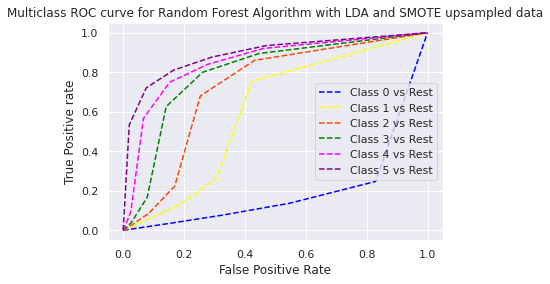

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_lda_ups_smote_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with LDA and SMOTE upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with LDA and SMOTE upsampled data',dpi=400)

In [ ]:
pickle.dump(rf_lda_ups_smote_y_prediction, open('rf_classifer_smote_upsampling_lda.pkl', 'wb'))

#### <font color='Magenta'>Random Forest Algorithm with Near Miss Downsampled Data

In [ ]:
rf_classifer_nm_downsample = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_nm_downsample.fit(x_train_dres_nm,y_train_dres_nm)
# prediction of train data
rf_ytrain_pred = rf_classifer_nm_downsample.predict(x_train_dres_nm)
# prediction of test data
rf_nm_downsampled_y_prediction = rf_classifer_nm_downsample.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train_dres_nm, rf_ytrain_pred, average='weighted'))

F1 Score: 0.9428881486240317


In [ ]:
print('Results of Random Forest Algorithm with Near Miss Downsample Data:\n')
print(confusion_matrix(y_test, rf_nm_downsampled_y_prediction))
print(classification_report(y_test, rf_nm_downsampled_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_nm_downsampled_y_prediction))
print('Precision:',precision_score(y_test, rf_nm_downsampled_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_nm_downsampled_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_nm_downsampled_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_nm_downsampled_y_prediction))

Results of Random Forest Algorithm with Near Miss Downsample Data:

[[87658 54059 55979 53490 44803 78119]
 [11746 19900 16963 15267 13273 26495]
 [ 4490  6222 14697 11961  8840 19512]
 [ 1953  2258  5237 12090  7059 14575]
 [  573   749  1374  3326  8318  8705]
 [   66    83   112   282  1293  7058]]
              precision    recall  f1-score   support

           0       0.82      0.23      0.36    374108
           1       0.24      0.19      0.21    103644
           2       0.16      0.22      0.18     65722
           3       0.13      0.28      0.17     43172
           4       0.10      0.36      0.16     23045
           5       0.05      0.79      0.09      8894

    accuracy                           0.24    618585
   macro avg       0.25      0.35      0.20    618585
weighted avg       0.57      0.24      0.29    618585

Accuracy: 0.2420378767671379
Precision: 0.5675524678513595
Recall: 0.2420378767671379
F1 Score: 0.2949472041170584
Cohen Kappa Score: 0.09510677266294798


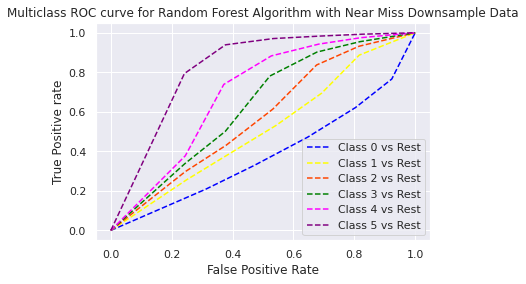

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_nm_downsampled_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with Near Miss Downsample Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with Near Miss Downsample Data',dpi=400)

In [ ]:
pickle.dump(rf_nm_downsampled_y_prediction, open('rf_classifer_nm_downsample.pkl', 'wb'))